In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")


In [2]:
games = pd.read_csv('vgsales.csv')

In [3]:
# Verify data was pulled in successfully.
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
# Check datatypes for the columns.
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
games.Year.isnull().sum()

271

## Takeaways
* The 'Year' column has missing values, so I will have to drop the missing values before converting to and integer datatype.
* I will also drop missing values from all other columns as well.

In [6]:
# Drop missing values.
games.dropna(inplace=True)

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
# Convert 'Year' column into integer datatype.
games.Year = games.Year.astype(int)

In [9]:
# Verify change.
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [10]:
# Lowercase all columns.
columns = [col.lower() for col in games.columns]
games.columns = columns

In [11]:
# Drop all observations where global sales are less than one million.
games = games[games.global_sales > 1.0]

In [12]:
# Create a dataframe for the games that sold less than a million copies globally.
low_sales = games[games.global_sales < 1.0]

In [13]:
# Take a peek at the different platforms that produced a game/games that sold over one million globally.
games.platform.value_counts()

PS2     316
PS3     242
X360    231
PS      199
Wii     155
DS      142
PS4      73
NES      72
PC       68
GBA      68
PSP      56
GB       53
XB       52
N64      50
SNES     48
3DS      47
GC       46
XOne     43
2600     23
WiiU     19
GEN      11
PSV       7
DC        6
SAT       3
SCD       1
Name: platform, dtype: int64

### Let's bin the ages into three categories: old_af, middle_aged, noob
* Anything from 2010 and up will be considered a noob.
* Anything from 1980 - 2002(inclusive) will be considered old_af.
* Anything from 2003 - 2009(inclusive) will be considered middle_aged.

In [66]:
games['age_bins'] = pd.cut(games.year, bins = [0, 2002, 2009, 2022], labels = ['old_af','middle_aged','noob'])

In [72]:
games[games.year.between(1980,2002)]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales,age_bins
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,37,11.16,old_af
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,26,20.11,old_af
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,33,7.06,old_af
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,38,1.38,old_af
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,23,14.09,old_af
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,2035,Final Fight 2,SNES,1993,Action,Capcom,0.39,0.12,0.49,0.02,1.02,29,0.63,old_af
2035,2037,The Lost World: Jurassic Park,PS,1997,Action,Electronic Arts,0.57,0.39,0.00,0.07,1.02,25,0.46,old_af
2040,2042,Pong: The Next Level,PS,1998,Puzzle,Hasbro Interactive,0.56,0.38,0.00,0.07,1.01,24,0.45,old_af
2046,2048,NBA Jam Tournament Edition,SNES,1995,Sports,Acclaim Entertainment,0.87,0.12,0.00,0.02,1.01,27,0.14,old_af


# Takeaways
* I have the dataframe in a state where I am ready to begin Exploratory Data Analysis.
* My target variable will be 'na_sales'.
* I will have to drop 'global_sales' and 'rank' to prevent data leakage.

In [4]:
# Create a function that will acquire the data and prepare it for Exploratory Data Analysis
def acquire_and_prep():
    games = pd.read_csv('vgsales.csv')
    # Drop missing values.
    games.dropna(inplace=True)
    # Convert 'Year' column into integer datatype.
    games.Year = games.Year.astype(int)
    # Lowercase all columns.
    columns = [col.lower() for col in games.columns]
    games.columns = columns
    # Drop all observations where global sales are less than one million.
    games = games[games.global_sales > 1.0]
    # Create a column that gives the age of the game as opposed to the year it was released.
    games['age'] = 2022 - games.year
    # Create a column that combines all sales outside of North America
    games['combined_sales'] = games.eu_sales + games.jp_sales + games.other_sales
    # Create age_bins for the games.
    games['age_bins'] = pd.cut(games.year, bins = [0, 2002, 2009, 2022], labels = ['old_af','middle_aged','noob'])
    # Create two separate dataframes. One for quantitative values and the other for qualitative values.
    quantitative_values = games.select_dtypes(exclude=['object','category']).columns
    qualitative_values = games.select_dtypes(include=['object', 'category']).columns
    # Create a column that assigns a value of 1 for games that sold over five million copies.
    train['over_five_mill'] = (train.na_sales > 5).astype(int)
    return games

In [5]:
games = acquire_and_prep()

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 0 to 2053
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   rank            2031 non-null   int64   
 1   name            2031 non-null   object  
 2   platform        2031 non-null   object  
 3   year            2031 non-null   int64   
 4   genre           2031 non-null   object  
 5   publisher       2031 non-null   object  
 6   na_sales        2031 non-null   float64 
 7   eu_sales        2031 non-null   float64 
 8   jp_sales        2031 non-null   float64 
 9   other_sales     2031 non-null   float64 
 10  global_sales    2031 non-null   float64 
 11  age             2031 non-null   int64   
 12  combined_sales  2031 non-null   float64 
 13  age_bins        2031 non-null   category
dtypes: category(1), float64(6), int64(3), object(4)
memory usage: 224.3+ KB


# Visualize Distributions

### Loop through the quantitative values and show the distribution of each on a separate subplot.

In [7]:
# Create two separate dataframes. One for quantitative values and the other for qualitative values.
quantitative_values = games.select_dtypes(exclude=['object','category']).columns
qualitative_values = games.select_dtypes(include=['object', 'category']).columns

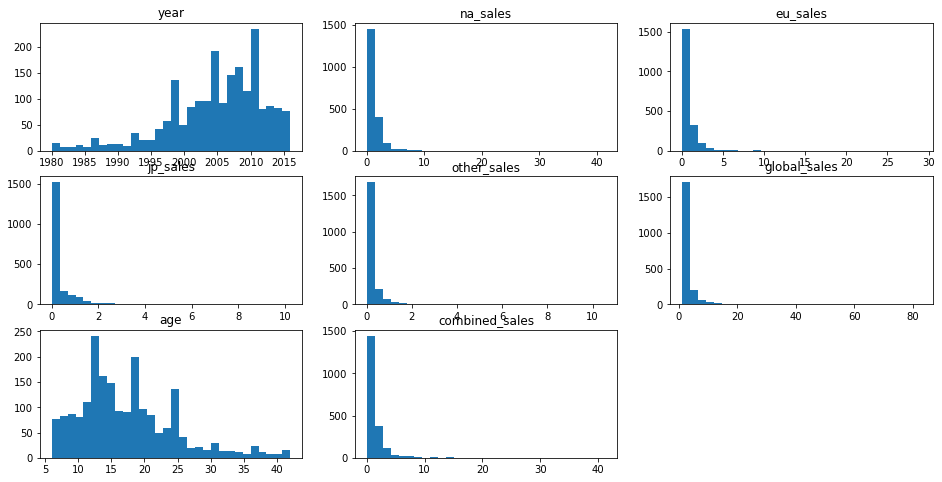

In [78]:
plt.figure(figsize=(16,8))

for i, col in enumerate(quantitative_values[1:]):
    plot_number = i + 1
    plt.subplot(3,3,plot_number)
    plt.title(col)
    games[col].hist(bins = 30)
    plt.grid(False)

# Takeaways
* The 'year/age' diagram seems to be the only feature that is normaly(ish) distributed.
* All other features are right skewed.

### Loop through the qualitative values and show the distribution of each on a separate subplot.

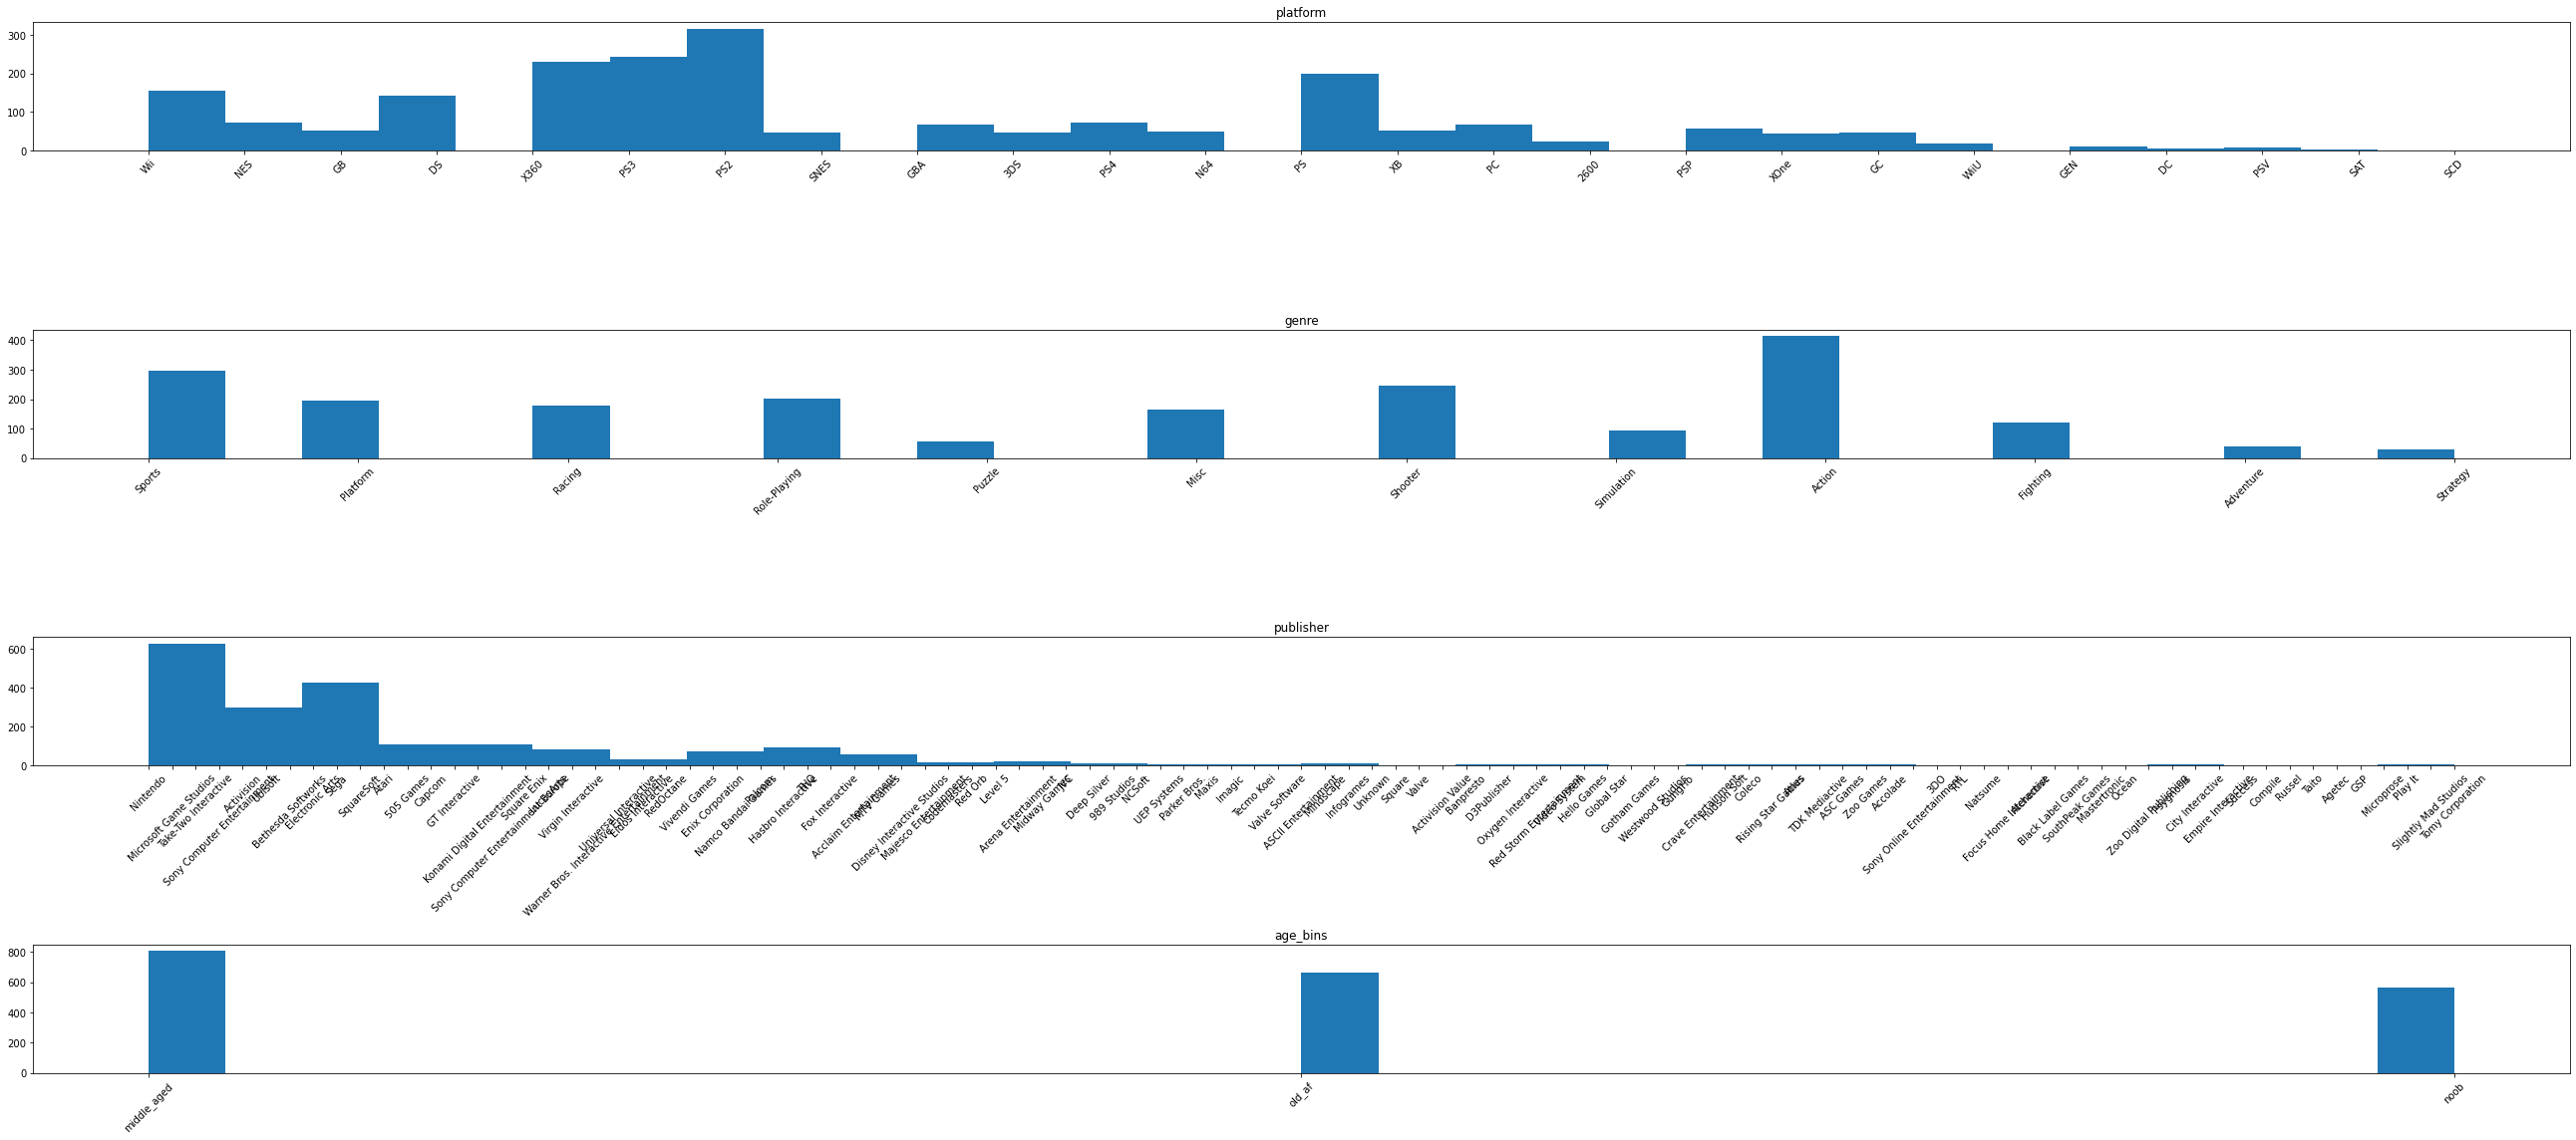

In [80]:
plt.figure(figsize=(36,16))

for i, col in enumerate(qualitative_values[1:]):
    plot_number = i + 1
    plt.subplot(4,1,plot_number)
    plt.title(col)
    games[col].hist(bins = 30, align='mid')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()

# Takeaways
* The PS2 is the highest selling console.
* Nintendo created the most game consoles.
* Out of the Nintendo consoles the Wii sold the most units.
* Action and sports games are two of the most popular genres.
* My favorite genre, Role-Playing, is the fourth most popular genre.
* Puzzle, simulation, adventure, and strategy are the least popular genres.
* Nintendo and Microsoft Game Studios produced the most amount of games.

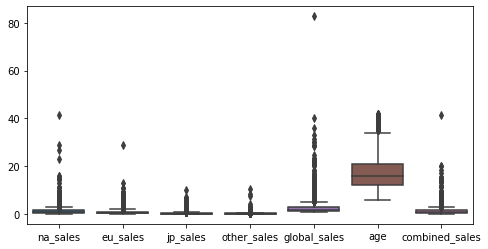

In [83]:
plt.figure(figsize=(8,4))

# Create boxplots for all quantitative values.
sns.boxplot(data=games.drop(columns=['year','rank']))
plt.show()

# Takeaways
* All columns have many outliers. I'm not sure what to do with them at this point.
* I'll leave them in for now and see how they affect my model.

### Which region has the most video game sales?

In [28]:
games.na_sales.sum(), games.eu_sales.sum(), games.other_sales.sum()

(2745.34, 1643.55, 528.64)

In [29]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,2031.0,1027.041359,593.731946,1.00,512.50,1027.00,1540.500,2055.00
year,2031.0,2004.703594,7.212932,1980.00,2001.00,2006.00,2010.000,2016.00
na_sales,2031.0,1.351718,1.982857,0.00,0.57,0.91,1.500,41.49
eu_sales,2031.0,0.809232,1.234846,0.00,0.27,0.51,0.945,29.02
jp_sales,2031.0,0.355613,0.789952,0.00,0.00,0.03,0.350,10.22
other_sales,2031.0,0.260286,0.480347,0.00,0.08,0.15,0.270,10.57
global_sales,2031.0,2.776839,3.692475,1.01,1.28,1.73,2.850,82.74
age,2031.0,17.296406,7.212932,6.00,12.00,16.00,21.000,42.00
combined_sales,2031.0,1.425130,2.003975,0.00,0.57,0.90,1.520,41.25


# Takeaways
* North American region has the highest amount of video game sales.

# Split the data

In [8]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(games, test_size=.2, 
                                        random_state=123)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)

print("train observations: ", train.shape[0])
print("validate observations: ", validate.shape[0])
print("test observations: ", test.shape[0])

train observations:  1136
validate observations:  488
test observations:  407


In [9]:
train.shape

(1136, 14)

In [10]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 1428 to 2007
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   rank            488 non-null    int64   
 1   name            488 non-null    object  
 2   platform        488 non-null    object  
 3   year            488 non-null    int64   
 4   genre           488 non-null    object  
 5   publisher       488 non-null    object  
 6   na_sales        488 non-null    float64 
 7   eu_sales        488 non-null    float64 
 8   jp_sales        488 non-null    float64 
 9   other_sales     488 non-null    float64 
 10  global_sales    488 non-null    float64 
 11  age             488 non-null    int64   
 12  combined_sales  488 non-null    float64 
 13  age_bins        488 non-null    category
dtypes: category(1), float64(6), int64(3), object(4)
memory usage: 54.0+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 1733 to 1779
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   rank            407 non-null    int64   
 1   name            407 non-null    object  
 2   platform        407 non-null    object  
 3   year            407 non-null    int64   
 4   genre           407 non-null    object  
 5   publisher       407 non-null    object  
 6   na_sales        407 non-null    float64 
 7   eu_sales        407 non-null    float64 
 8   jp_sales        407 non-null    float64 
 9   other_sales     407 non-null    float64 
 10  global_sales    407 non-null    float64 
 11  age             407 non-null    int64   
 12  combined_sales  407 non-null    float64 
 13  age_bins        407 non-null    category
dtypes: category(1), float64(6), int64(3), object(4)
memory usage: 45.0+ KB


In [12]:
# Get familiar with train.
train

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales,age_bins
2030,2032,Shrek 2,GC,2004,Platform,Activision,0.73,0.26,0.01,0.03,1.02,18,0.30,middle_aged
1329,1331,Dragon Quest Monsters: Joker 2,DS,2010,Role-Playing,Square Enix,0.11,0.08,1.24,0.02,1.45,12,1.34,noob
1670,1672,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,1.20,7,0.69,noob
961,963,Sly 2: Band of Thieves,PS2,2004,Platform,Sony Computer Entertainment,0.88,0.69,0.00,0.23,1.81,18,0.92,middle_aged
1228,1230,Dead Space 2,X360,2011,Shooter,Electronic Arts,0.94,0.45,0.00,0.13,1.52,11,0.58,noob
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,727,New Super Luigi U,WiiU,2013,Platform,Nintendo,1.27,0.62,0.18,0.16,2.22,9,0.96,noob
1330,1332,Tony Hawk's American Wasteland (Weekly america...,PS2,2005,Sports,Activision,1.38,0.05,0.00,0.02,1.45,17,0.07,middle_aged
1961,1963,Seek and Destroy,PS2,2002,Racing,Play It,0.52,0.40,0.00,0.14,1.06,20,0.54,old_af
909,911,Need for Speed Rivals,PS4,2013,Racing,Electronic Arts,0.73,0.91,0.03,0.22,1.89,9,1.16,noob


# Hypothesize

### 1) Newer games have higher North American sales than older games.

### 2) A combination of sales outside of North America is a good indicator of North American sales.

### 3) The platform the game is played on is a good indicator for North American Sales.

### 4) War and sports games will be a good indicator for North American Sales.

# Target Variable: 'na_sales'

## Let's see how each variable interacts with our target variable.

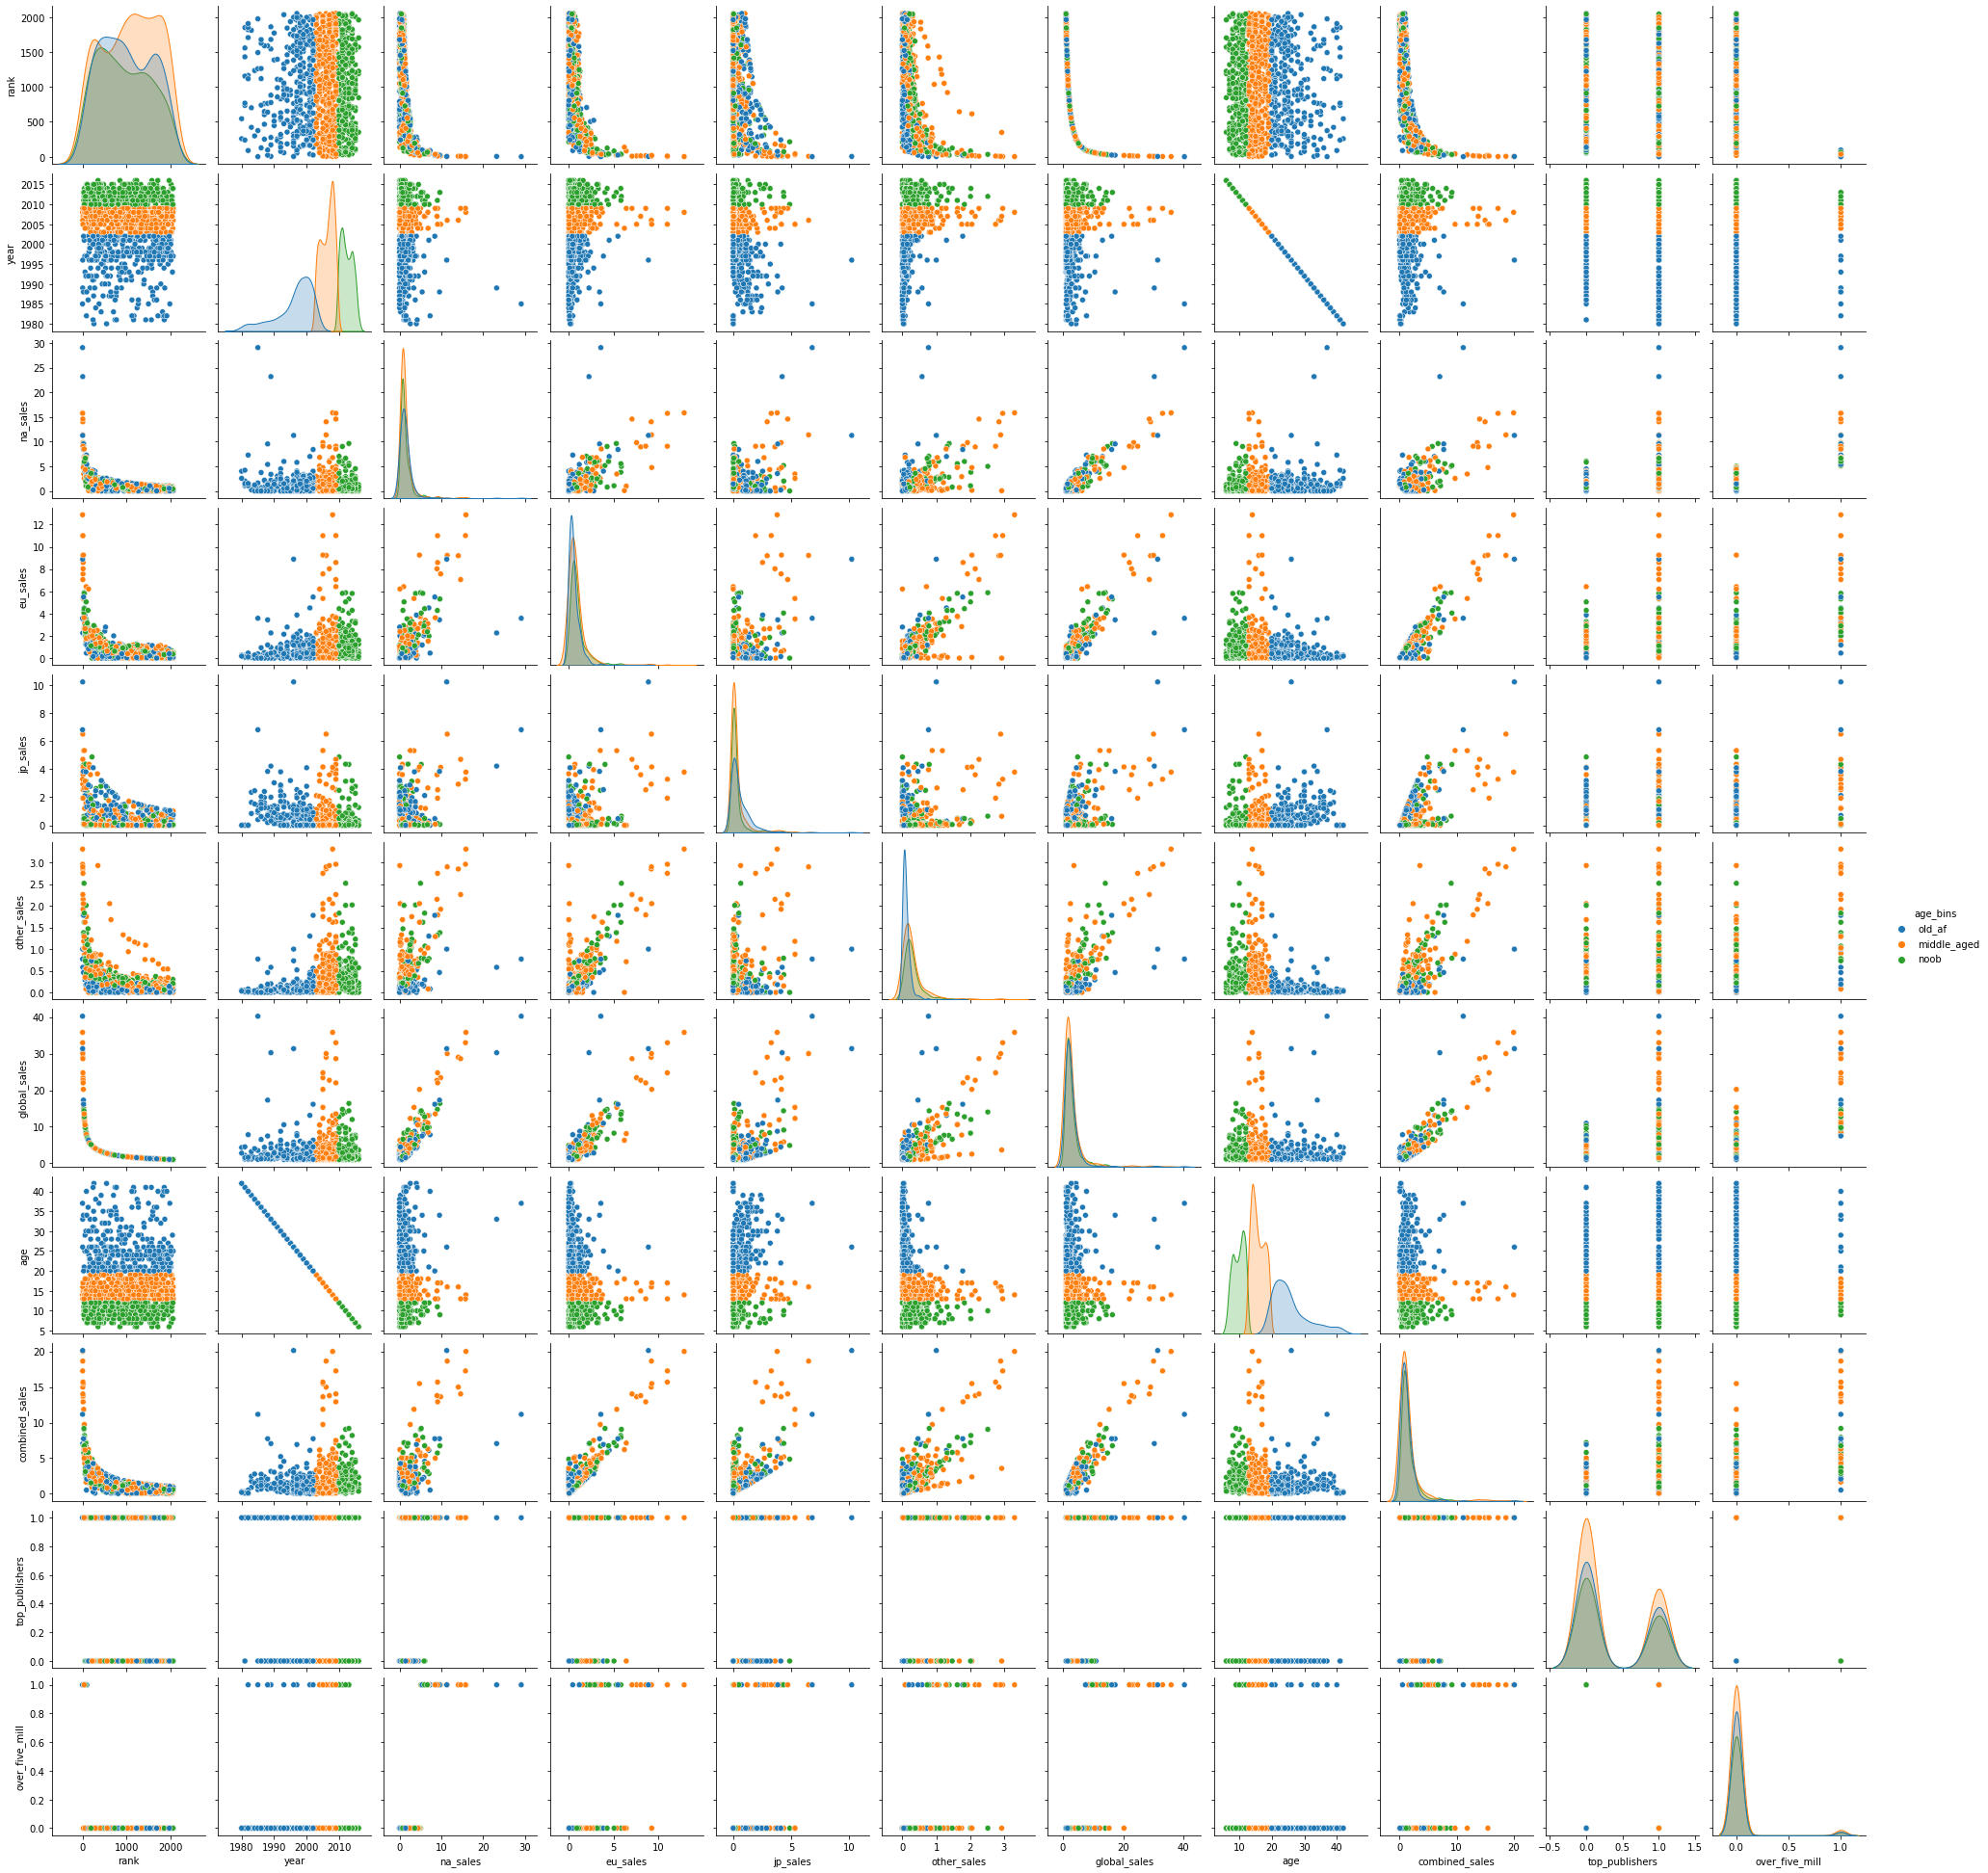

In [315]:
sns.pairplot(train, hue='age_bins')

# Takeaways
* Our target seems to have a positive correlation with all the other features.
* I will use EDA to confirm.

#### Separate the target variable from the independent variables and drop columns that may cause target leakage and any other unwanted columns.

In [90]:
# Create a dataframe called 'X_train' that drops 'na_sales'(target), 'rank', 'name', and 'global_sales'.
X_train = train.drop(columns=['na_sales','rank','name','global_sales','year'])
X_validate = validate.drop(columns=['na_sales','rank','name','global_sales','year'])
X_test = test.drop(columns=['na_sales','rank','name','global_sales','year'])

In [13]:
# Create variables that hold values for the target.
y_train = train.na_sales
y_validate = validate.na_sales
y_test = test.na_sales

In [38]:
len(y_train), len(y_validate), len(y_test)

(1136, 488, 407)

In [111]:
# Create a function that iterates through the categorical columns and plots a Seaborn barplot of that column vs the target.
def qualitative_boxplot():
    plt.figure(figsize=(36,56))
    for i, col in enumerate(qualitative_values[1:]):
        plot_number = i + 1
        plt.subplot(4,1,plot_number)
        plt.title(col)
        sns.barplot(x=col, y="na_sales", data=train)
        na_sales_rate = train.na_sales.mean()
        plt.axhline(na_sales_rate, label="North American Sales Rate")
        plt.xticks(rotation=45)
        plt.grid(False)
        plt.tight_layout()

## Visualize categorical subgroups within North American region.

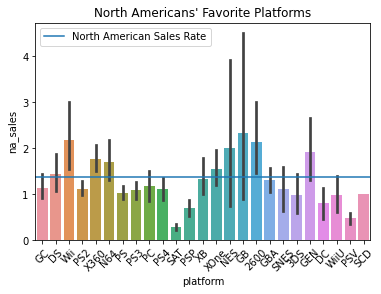

In [97]:
# Platform vs NA Sales
plt.title("North Americans' Favorite Platforms")
sns.barplot(x="platform", y="na_sales", data=train)
na_sales_rate = train.na_sales.mean()
plt.axhline(na_sales_rate, label="North American Sales Rate")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [54]:
train[train['platform'] == 'GC'].na_sales.mean()

1.139

In [55]:
train.na_sales.mean()

1.3688292253521128

In [64]:
train.platform.unique()

array(['GC', 'DS', 'Wii', 'PS2', 'X360', 'N64', 'PS', 'PS3', 'PC', 'PS4',
       'SAT', 'PSP', 'XB', 'XOne', 'NES', 'GB', '2600', 'GBA', 'SNES',
       '3DS', 'GEN', 'DC', 'WiiU', 'PSV', 'SCD'], dtype=object)

In [65]:
top_platforms = []
for platform in train.platform.unique():
    if train[train['platform'] == platform].na_sales.mean() > train.na_sales.mean():
        top_platforms.append(platform)
        print(top_platforms)

['DS']
['DS', 'Wii']
['DS', 'Wii', 'X360']
['DS', 'Wii', 'X360', 'N64']
['DS', 'Wii', 'X360', 'N64', 'XOne']
['DS', 'Wii', 'X360', 'N64', 'XOne', 'NES']
['DS', 'Wii', 'X360', 'N64', 'XOne', 'NES', 'GB']
['DS', 'Wii', 'X360', 'N64', 'XOne', 'NES', 'GB', '2600']
['DS', 'Wii', 'X360', 'N64', 'XOne', 'NES', 'GB', '2600', 'GEN']


In [66]:
top_platforms

['DS', 'Wii', 'X360', 'N64', 'XOne', 'NES', 'GB', '2600', 'GEN']

### Let's find out how many games were made for each platform.

In [123]:
train.platform.value_counts()

PS2     165
X360    132
PS3     125
PS      112
Wii      89
DS       84
PSP      45
GBA      42
PS4      41
PC       34
NES      34
GC       30
XOne     27
XB       27
3DS      26
GB       25
SNES     25
N64      24
2600     16
WiiU     13
GEN       9
DC        4
PSV       4
SAT       2
SCD       1
Name: platform, dtype: int64

## Let's check out the more unfamiliar platforms that made the 'top_platforms' list and verify the platform deserves to be on the list.

In [124]:
train[train.platform == 'GEN']

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales,age_bins,top_publishers
254,255,Sonic the Hedgehog,GEN,1991,Platform,Sega,3.03,0.91,0.26,0.13,4.34,31,1.30,old_af,0
952,954,Sonic & Knuckles,GEN,1994,Platform,Sega,1.24,0.43,0.03,0.12,1.82,28,0.58,old_af,0
1099,1101,Street Fighter II': Special Champion Edition,GEN,1992,Fighting,Sega,1.00,0.30,0.31,0.04,1.66,30,0.65,old_af,0
143,144,Sonic the Hedgehog 2,GEN,1992,Platform,Sega,4.47,1.20,0.16,0.19,6.03,30,1.55,old_af,0
827,829,NBA Jam,GEN,1992,Sports,Arena Entertainment,1.75,0.25,0.00,0.05,2.05,30,0.30,old_af,0
1458,1460,Mortal Kombat 3,GEN,1994,Fighting,Acclaim Entertainment,1.03,0.27,0.00,0.04,1.34,28,0.31,old_af,0
588,589,Streets of Rage,GEN,1990,Action,Sega,1.86,0.55,0.11,0.08,2.60,32,0.74,old_af,0
1841,1843,NBA Jam Tournament Edition,GEN,1994,Sports,Acclaim Entertainment,0.95,0.14,0.00,0.03,1.11,28,0.17,old_af,0
564,565,Mortal Kombat,GEN,1992,Fighting,Arena Entertainment,1.95,0.63,0.00,0.09,2.67,30,0.72,old_af,0


# Takaways
* Even though the Sega Genesis only has 9 game titles it definitely belongs on the list.
* Sonic the Hedgehog represents a classic battle between the two console behemoths at that time. Sega tried to keep pace with Nintendo and Sonic:Sega as Mario:Nintendo. Sonic fought an uphill battle and eventually lost out in the end. Becoming just features on other games while Mario is still killin' it.
* Sonic also had his own cartoon where he teamed up with Tails to defeat Dr. Robotnik.
* NBA Jam cannot be beat out by any current basketball game in regards to fun.
* Mortal Kombat is still relevent to this day coming out with their most recent movie.

In [127]:
train[train.platform == '2600']

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales,age_bins,top_publishers
1163,1165,Mario Bros.,2600,1982,Platform,Atari,1.48,0.09,0.0,0.02,1.59,40,0.11,old_af,1
258,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31,42,0.31,old_af,1
1817,1819,Moon Patrol,2600,1982,Shooter,Atari,1.05,0.06,0.0,0.01,1.12,40,0.07,old_af,1
1556,1558,Atlantis,2600,1981,Shooter,Imagic,1.18,0.08,0.0,0.01,1.27,41,0.09,old_af,0
239,240,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.0,0.05,4.50,41,0.29,old_af,1
1848,1850,Megamania,2600,1981,Shooter,Activision,1.03,0.06,0.0,0.01,1.10,41,0.07,old_af,1
89,90,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.0,0.08,7.81,40,0.53,old_af,1
734,736,Frogger,2600,1981,Action,Parker Bros.,2.06,0.12,0.0,0.02,2.20,41,0.14,old_af,0
1851,1853,Jungle Hunt,2600,1982,Platform,Atari,1.03,0.06,0.0,0.01,1.10,40,0.07,old_af,1
1905,1907,Joust,2600,1982,Platform,Atari,1.01,0.06,0.0,0.01,1.08,40,0.07,old_af,1


# Takeaways
* I think if we use a robust scaler it might help in dealing with the outliers, but I'll have to verify that.
* Other than Pac-Man this platform struggled to keep up with Nintendo and Sega. 
* I may even consider dropping this platform from the top_platforms list.

In [274]:
b = train[train.platform == 'PS3']

In [275]:
c = b[b.age_bins == 'noob']

In [293]:
d = c[c.genre == 'Racing']

In [294]:
d

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales,age_bins,top_publishers
1640,1642,F1 2011,PS3,2011,Racing,Codemasters,0.12,0.75,0.11,0.25,1.22,11,1.11,noob,0
522,523,Need for Speed: Hot Pursuit,PS3,2010,Racing,Electronic Arts,1.05,1.25,0.03,0.48,2.81,12,1.76,noob,0


In [276]:
c.genre.unique()

array(['Action', 'Shooter', 'Role-Playing', 'Fighting', 'Adventure',
       'Sports', 'Platform', 'Misc', 'Racing'], dtype=object)

In [305]:
# Create a column that assigns a value of 1 for games that sold over five million copies.
train['over_five_mill'] = (train.na_sales > 5).astype(int)

In [306]:
train

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales,age_bins,top_publishers,over_five_mill
2030,2032,Shrek 2,GC,2004,Platform,Activision,0.73,0.26,0.01,0.03,1.02,18,0.30,middle_aged,1,0
1329,1331,Dragon Quest Monsters: Joker 2,DS,2010,Role-Playing,Square Enix,0.11,0.08,1.24,0.02,1.45,12,1.34,noob,0,0
1670,1672,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,1.20,7,0.69,noob,0,0
961,963,Sly 2: Band of Thieves,PS2,2004,Platform,Sony Computer Entertainment,0.88,0.69,0.00,0.23,1.81,18,0.92,middle_aged,0,0
1228,1230,Dead Space 2,X360,2011,Shooter,Electronic Arts,0.94,0.45,0.00,0.13,1.52,11,0.58,noob,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,727,New Super Luigi U,WiiU,2013,Platform,Nintendo,1.27,0.62,0.18,0.16,2.22,9,0.96,noob,1,0
1330,1332,Tony Hawk's American Wasteland (Weekly america...,PS2,2005,Sports,Activision,1.38,0.05,0.00,0.02,1.45,17,0.07,middle_aged,1,0
1961,1963,Seek and Destroy,PS2,2002,Racing,Play It,0.52,0.40,0.00,0.14,1.06,20,0.54,old_af,0,0
909,911,Need for Speed Rivals,PS4,2013,Racing,Electronic Arts,0.73,0.91,0.03,0.22,1.89,9,1.16,noob,0,0


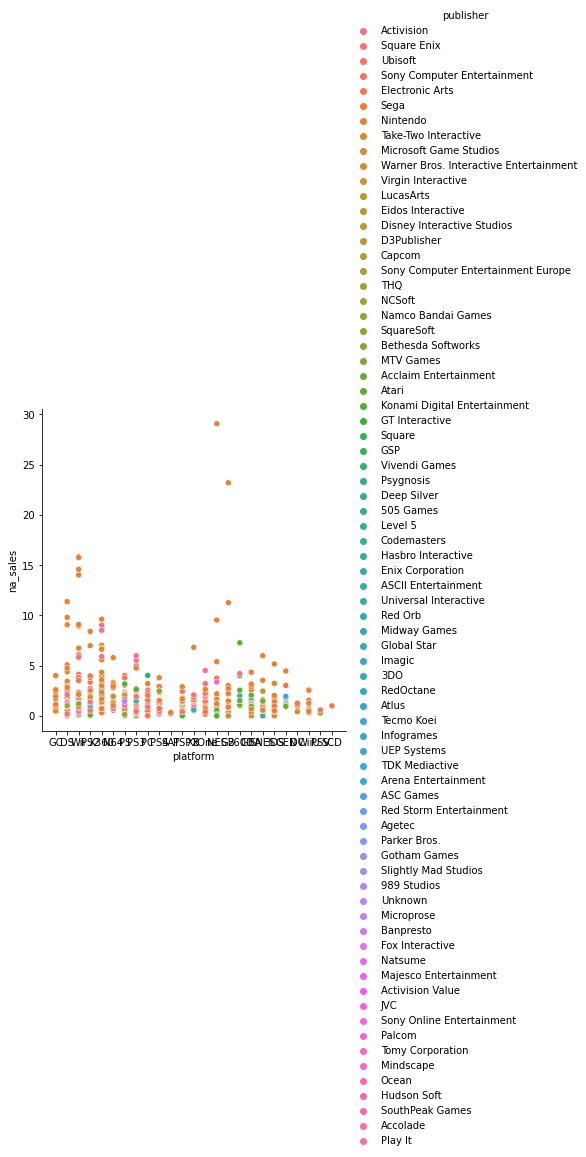

In [298]:
sns.relplot(x=train.platform, y=train.na_sales, hue = 'publisher', data = train)

In [314]:
train[train.publisher == 'Square']

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales,age_bins,top_publishers,over_five_mill
983,985,Final Fantasy II,SNES,1991,Role-Playing,Square,0.24,0.09,1.33,0.12,1.77,31,1.54,old_af,0,0


In [267]:
train[train.publisher == 'Square Enix']

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales,age_bins,top_publishers
1329,1331,Dragon Quest Monsters: Joker 2,DS,2010,Role-Playing,Square Enix,0.11,0.08,1.24,0.02,1.45,12,1.34,noob,0
752,754,Final Fantasy XIII,X360,2010,Role-Playing,Square Enix,1.27,0.68,0.01,0.20,2.17,12,0.89,noob,0
745,747,Hitman: Absolution,PS3,2012,Action,Square Enix,0.59,1.07,0.07,0.45,2.19,10,1.59,noob,0
1948,1950,Sleeping Dogs,PS3,2012,Action,Square Enix,0.31,0.50,0.05,0.19,1.06,10,0.74,noob,0
1353,1355,Dragon Quest VII: Warriors of Eden,3DS,2013,Role-Playing,Square Enix,0.07,0.04,1.30,0.01,1.42,9,1.35,noob,0
255,256,Kingdom Hearts II,PS2,2005,Role-Playing,Square Enix,2.20,0.58,1.38,0.17,4.33,17,2.13,middle_aged,0
1743,1745,Final Fantasy Tactics: The War of the Lions,PSP,2007,Role-Playing,Square Enix,0.45,0.25,0.30,0.16,1.16,15,0.71,middle_aged,0
1487,1489,Kingdom Hearts II,PS3,2014,Role-Playing,Square Enix,0.52,0.43,0.18,0.19,1.32,8,0.80,noob,0
1392,1394,Deus Ex: Human Revolution,PS3,2011,Shooter,Square Enix,0.50,0.60,0.07,0.23,1.39,11,0.90,noob,0
1292,1294,Chrono Trigger,DS,2008,Role-Playing,Square Enix,0.69,0.20,0.49,0.09,1.47,14,0.78,middle_aged,0


# Takeaways
* This was my favorite publisher from when I was in elementary school! Well it actually started out as Square in Japan in 1983, then a North American subsidiary called SquareSoft was created in 1989, and later merged with Enix to become SquareEnix in 2003.
* Square produced a game titled 'Final Fantasy III'(known as 'Final Fantasy VI' in Japan) in 1994. I was 10 years old when this game came out in the US and it was the first game I ever played from Square. I woke up early on school days to get a few minutes of gameplay in and after school I would finish my homework quickly, eat dinner quickly, and shower quickly so I could get as much gametime as possible. I spent weekends staying up late playing this game. 

# Takeaways
* It seems as if we control for platform, age_bins, genre, and top_publishers it'll give you a good indication of North American Sales.
* If this is the case, I can create clusters of (platform_name, age_bins, genre, top_publisher or not)
* An example of the description of a cluster:
    - "Middle-aged Fighting game on the Wii by a top publisher." 
    - "{age_bins}, {genre}, {platform}, {top_publisher}"
* However, upon further exploration, my 'top_publisher' columns doesn't seem to consistently have games with higher sales. I might have to rethink the importance of being a popular publisher. Because some top publishers have produced low selling games.

In [139]:
train[train.platform == 'GB']

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales,age_bins,top_publishers
1620,1622,Kirby Tilt 'n' Tumble,GB,2000,Puzzle,Nintendo,0.29,0.17,0.75,0.02,1.23,22,0.94,old_af,1
1770,1772,Qix,GB,1990,Puzzle,Nintendo,0.51,0.20,0.41,0.03,1.15,32,0.64,old_af,1
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,33,7.06,old_af,1
184,185,Super Mario Land 3: Wario Land,GB,1994,Platform,Nintendo,2.49,0.98,1.57,0.15,5.19,28,2.70,old_af,1
170,171,Dr. Mario,GB,1989,Puzzle,Nintendo,2.18,0.96,2.00,0.20,5.34,33,3.16,old_af,1
1710,1712,Mario Tennis,GB,2000,Sports,Nintendo,0.50,0.18,0.44,0.06,1.18,22,0.68,old_af,1
746,748,Yu-Gi-Oh: Duel Monsters 4,GB,2000,Role-Playing,Konami Digital Entertainment,0.00,0.00,2.17,0.01,2.18,22,2.18,old_af,0
987,989,Metroid II: Return of Samus,GB,1991,Adventure,Nintendo,0.85,0.31,0.56,0.04,1.76,31,0.91,old_af,1
1542,1544,Yakuman,GB,1989,Misc,Nintendo,0.00,0.00,1.28,0.00,1.28,33,1.28,old_af,1
1280,1282,Wario Land II,GB,1997,Platform,Nintendo,0.70,0.35,0.39,0.04,1.48,25,0.78,old_af,1


# Takeaways
* As much as I would love to keep Nintendo's Gameboy on the top platforms list I don't think it will be a good indicator of NA sales. Only a couple of games sold really well while all other games sold nothing in comparison.
* I'll drop this from the top platform's list

In [143]:
train[train.platform == 'NES'].genre.unique()

array(['Sports', 'Fighting', 'Platform', 'Role-Playing', 'Puzzle',
       'Adventure', 'Action', 'Racing', 'Shooter'], dtype=object)

In [304]:
train[train.platform == 'NES']

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales,age_bins,top_publishers,over_five_mill
759,761,Volleyball,NES,1987,Sports,Nintendo,0.14,0.03,1.98,0.00,2.15,35,2.01,old_af,1,False
465,466,Mike Tyson's Punch-Out!!,NES,1987,Fighting,Nintendo,2.03,0.47,0.45,0.07,3.02,35,0.99,old_af,1,False
700,702,Mario Bros.,NES,1983,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28,39,1.77,old_af,1,False
1385,1387,Final Fantasy III,NES,1990,Role-Playing,SquareSoft,0.00,0.00,1.39,0.01,1.40,32,1.40,old_af,0,False
446,447,Dragon Warrior IV,NES,1990,Role-Playing,Enix Corporation,0.08,0.00,3.03,0.01,3.12,32,3.04,old_af,0,False
1010,1012,Kirby's Adventure,NES,1993,Platform,Nintendo,0.79,0.14,0.80,0.02,1.75,29,0.96,old_af,1,False
1490,1492,Gyromite,NES,1985,Puzzle,Nintendo,0.73,0.16,0.40,0.03,1.32,37,0.59,old_af,1,False
251,252,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38,35,2.19,old_af,1,False
1394,1396,Teenage Mutant Ninja Turtles III: The Manhatta...,NES,1991,Action,Konami Digital Entertainment,1.05,0.17,0.15,0.02,1.39,31,0.34,old_af,0,False
764,766,R.C. Pro-Am,NES,1988,Racing,Nintendo,1.47,0.38,0.19,0.10,2.14,34,0.67,old_af,1,False


# Takeaways
* The NES created some timeless games that I'm sure even kids nowadays would enjoy playing. 
* The infamous Super Mario series, TMNT, Ledgend of Zelda, Kung Fu, Ghosts n' Goblins, and Mike Tyson's Punch-Out are some of the ones I used to play.

# Takeaways
* There are a few platforms that makes sales above the population average: Wii, XBox360, 2600
* The average sales of these platforms may be above populuation average: DS, N64, XBox1, NES, GB, SNES, Genesis
* There may be more platforms that have average sales above the population average, but these will do for now.

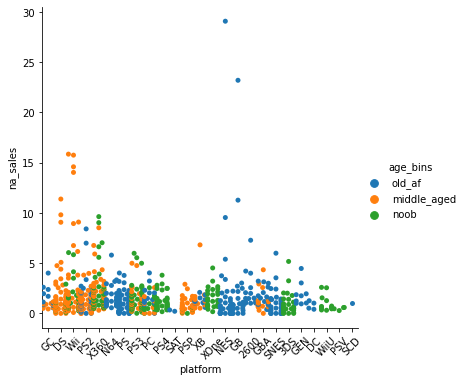

In [122]:
sns.catplot(x="platform", y="na_sales", hue="age_bins", kind="swarm", data=train)
plt.xticks(rotation=45)
plt.show()

# Takeaways
* From this graph, it seems like middle aged and noob games tend to sell more.
* However, NES and Gameboy are some OG's that have a couple games that outsold every other game.

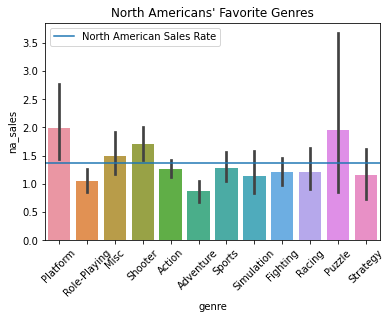

In [98]:
# Genre vs NA Sales
plt.title("North Americans' Favorite Genres")
sns.barplot(x="genre", y="na_sales", data=train)
na_sales_rate = train.na_sales.mean()
plt.axhline(na_sales_rate, label="North American Sales Rate")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Takeaways
* Platform and shooter type games sell above the population average.
* Sports, Misc, Action, Simulation, Fighting, Racing, and Strategy may have an average sale that is above the population average.
* My favorite genre's average sales is below that of the population average.

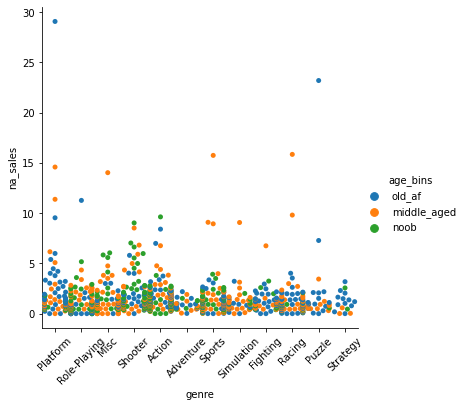

In [123]:
sns.catplot(x="genre", y="na_sales", hue="age_bins", kind="swarm", data=train)
plt.xticks(rotation=45)
plt.show()

# Takeaways
* Middle-aged and noob games tend to sell more than older games.
* Old platform games seem to sell well in the North American region.

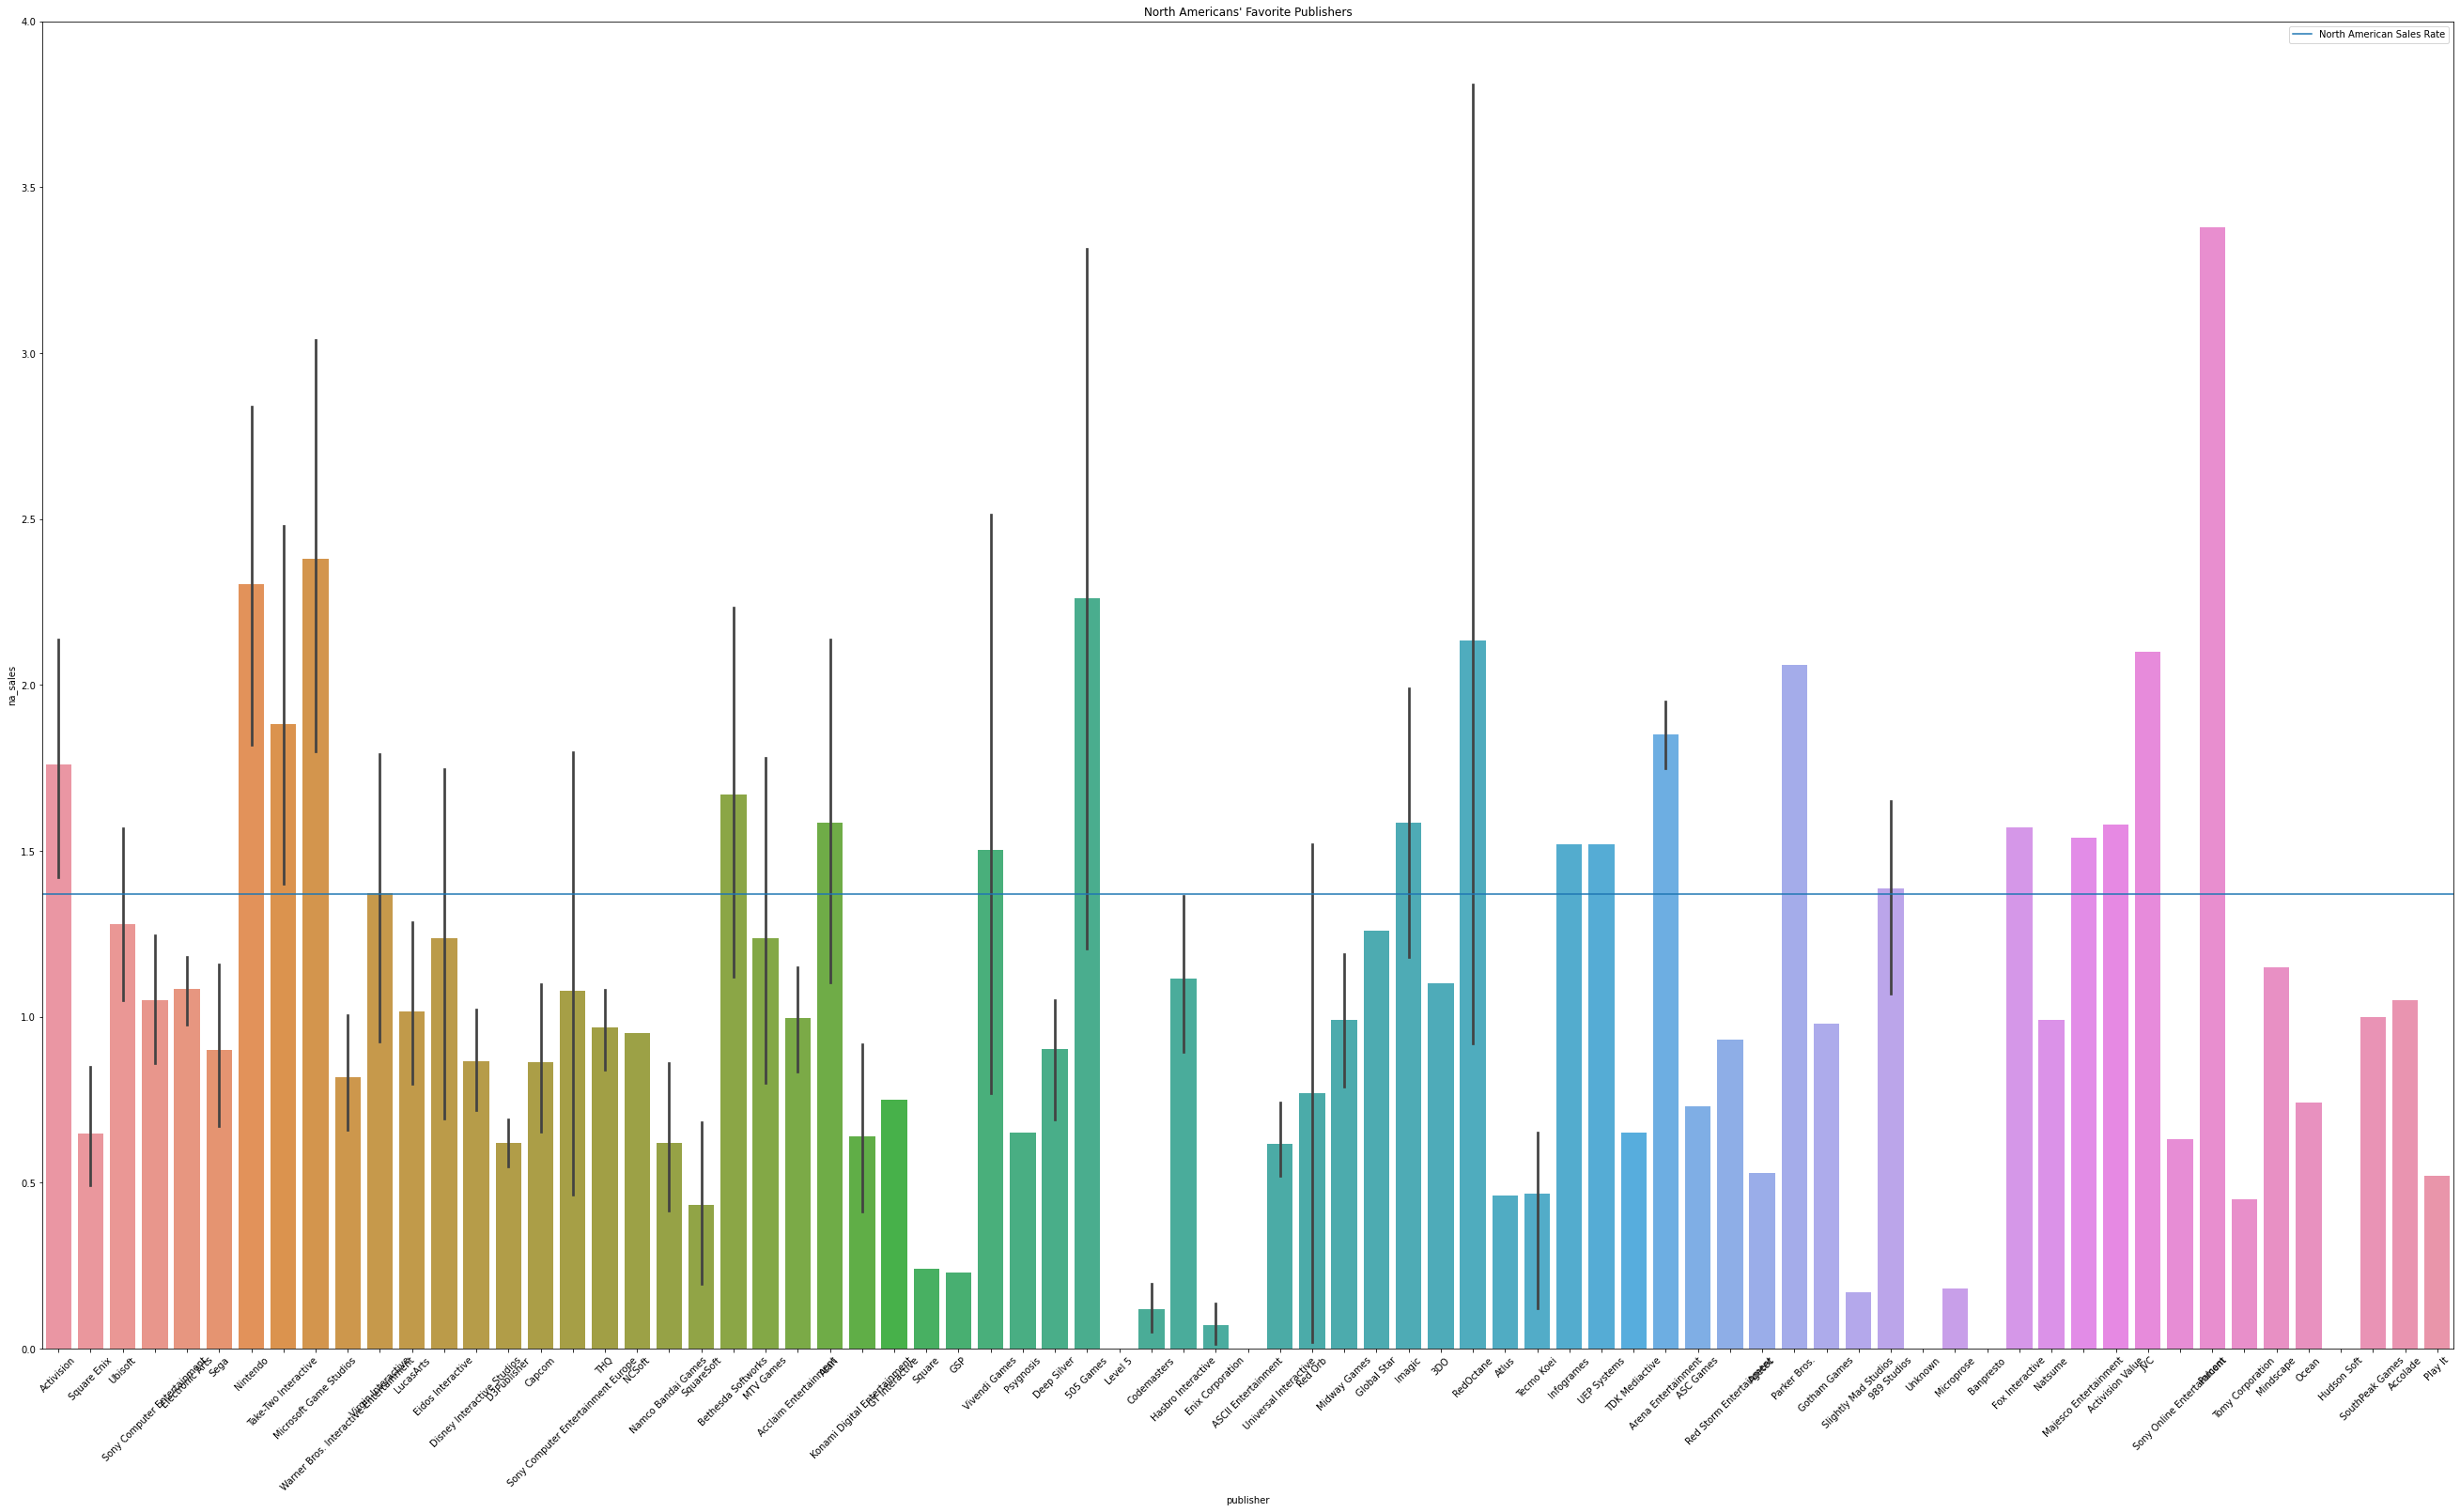

In [114]:
# Publisher vs NA Sales
plt.figure(figsize=(46,26))
plt.title("North Americans' Favorite Publishers")
sns.barplot(x="publisher", y="na_sales", data=train)
na_sales_rate = train.na_sales.mean()
plt.axhline(na_sales_rate, label="North American Sales Rate")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Takeaways
* Activision, Nintendo, Take-Two Interactive, Microsoft Game Studios, and Arena Entertainment have mean sales above the population average.
* 505 Games and RedOctane may have mean sales above the population average.

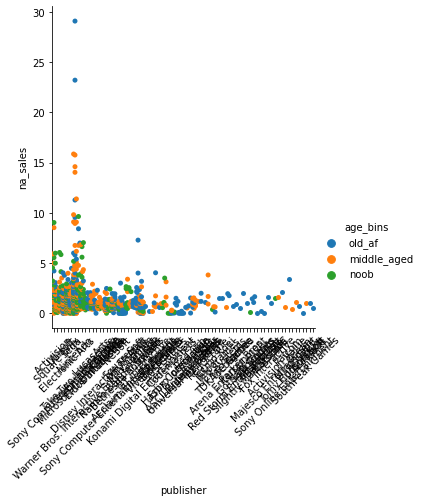

In [124]:
sns.catplot(x="publisher", y="na_sales", hue="age_bins", kind="swarm", data=train)
plt.xticks(rotation=45)
plt.show()

# Takeaways
* I need to learn how to make this diagram readable.

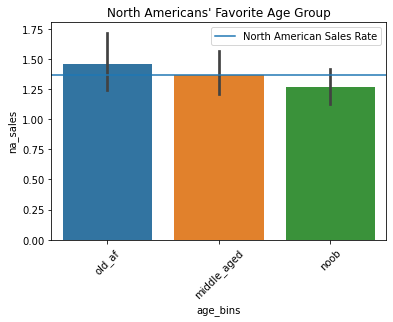

In [100]:
# Age Bin vs NA Sales
plt.title("North Americans' Favorite Age Group")
sns.barplot(x="age_bins", y="na_sales", data=train)
na_sales_rate = train.na_sales.mean()
plt.axhline(na_sales_rate, label="North American Sales Rate")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Takeaways
* Older games > middle-aged games > noob games

### What if we control for age?

In [54]:
train.year.min(), train.year.max()

(1980, 2016)

In [53]:
train.age.min(), train.age.max()

(6, 42)

## Use statistical tests on categorical subgroups within North American region to verify correlation.

In [40]:
# Create a function that iterates through the categorical features and runs the proper statistical test.
def qualitative_stats_test():
    for pub in leading_publishers:
        publisher_mean = train[train.publisher == pub].na_sales
        overall_mean = train.na_sales.mean()
    
        t, p = stats.ttest_1samp(publisher_mean, overall_mean)
    
        print(t, p/2)
        
        if p/2 > alpha:
            print("We fail to reject the null hypotheis.")
        elif t < 0:
            print("We fail to reject null hypothesis.")
        else:
            print(f"We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that {pub}'s average sales are greater than the population average.")

#### Within the target variable is there a difference in mean sales between developers? 

In [37]:
# Based on the barcharts above, create a list of the publishers that have mean sales greater than population.
leading_publishers = ['Activision', 'Nintendo', 'Take-Two Interactive', 'Microsoft Game Studios', 'Arena Entertainment', '505 Games', 'RedOctane']

In [112]:
top_pubs

['Activision',
 'Nintendo',
 'Take-Two Interactive',
 'Microsoft Game Studios',
 'Bethesda Softworks',
 'Atari']

#### $H_0$: These publishers' mean sales is equal to the mean sales of the population.

#### $H_a$: These publishers' mean sales are greater than the mean sales of the population.

In [19]:
alpha = 0.50

In [21]:
publisher_mean = train[train.publisher == 'Activision'].na_sales
overall_mean = train.na_sales.mean()

t, p = stats.ttest_1samp(publisher_mean, overall_mean)

print(t, p/2, alpha)

2.112860117006087 0.018772802726588284 0.5


In [23]:
if p/2 > alpha:
    print("We fail to reject the null hypotheis.")
elif t < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Activision's average sales are greater than the population average.")


We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Activision's average sales are greater than the population average.


In [39]:
for pub in leading_publishers:
    publisher_mean = train[train.publisher == pub].na_sales
    overall_mean = train.na_sales.mean()

    t, p = stats.ttest_1samp(publisher_mean, overall_mean)

    print(t, p/2)
    
    if p/2 > alpha:
        print("We fail to reject the null hypotheis.")
    elif t < 0:
        print("We fail to reject null hypothesis.")
    else:
        print(f"We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that {pub}'s average sales are greater than the population average.")

2.112860117006087 0.018772802726588284
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Activision's average sales are greater than the population average.
3.5460895289171726 0.00024479672795653585
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Nintendo's average sales are greater than the population average.
1.9029818253077373 0.03124044531412377
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Take-Two Interactive's average sales are greater than the population average.
3.133044985794307 0.0018082964891023732
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Microsoft Game Studios's average sales are greater than the population average.
4.811707746478874 0.06522472406374709
We reject the null hypothesis. There is sufficient evidence to move forward with the understan

# Takeaways
* All seven of our chosen publishers have average sales that are higher than the population average.
* I will create a column called 'top_publishers'

In [80]:
top_pubs

['Activision',
 'Nintendo',
 'Take-Two Interactive',
 'Microsoft Game Studios',
 'Virgin Interactive',
 'Bethesda Softworks',
 'Atari',
 'Vivendi Games',
 '505 Games',
 'Imagic',
 'RedOctane',
 'Infogrames',
 'UEP Systems',
 'Arena Entertainment',
 'Parker Bros.',
 '989 Studios',
 'Fox Interactive',
 'Majesco Entertainment',
 'Activision Value',
 'JVC',
 'Palcom']

In [102]:
contenders = []
for pubs in train.publisher.unique():    
    if (train.publisher == pubs).sum() > 10:
        contenders.append(pubs)

In [103]:
contenders

['Activision',
 'Square Enix',
 'Ubisoft',
 'Sony Computer Entertainment',
 'Electronic Arts',
 'Sega',
 'Nintendo',
 'Take-Two Interactive',
 'Microsoft Game Studios',
 'Warner Bros. Interactive Entertainment',
 'LucasArts',
 'Disney Interactive Studios',
 'Capcom',
 'THQ',
 'Namco Bandai Games',
 'SquareSoft',
 'Bethesda Softworks',
 'Acclaim Entertainment',
 'Atari',
 'Konami Digital Entertainment',
 'Midway Games']

In [104]:
top_pubs = []
for publisher in contenders:
    if train[train['publisher'] == publisher].na_sales.mean() > train.na_sales.mean():
        top_pubs.append(publisher)

In [105]:
top_pubs

['Activision',
 'Nintendo',
 'Take-Two Interactive',
 'Microsoft Game Studios',
 'Bethesda Softworks',
 'Atari']

# ** Important Takeaway **

### Based on the barplot alone, I made a list of publishers I thought their mean sales would be higher than the population average. I statistically tested my list and I was right. However, I tried a different tactic and made a useful discovery. Although all publishers in my list had a higher mean sale than the mean of the population, some of the publishers only published a few games. And when I looked into it one game had a ridiculous amount of sales, while the other games sold close to nothing. Therefore I created a condition where the publisher had to have published more than 10 titles. When I did this it brought back a more useful list of publishers. Nice find!

In [119]:
# Create a function that iterates through the list of publishers and returns the publishers that published more
# than 10 titles and have mean sales greater than the population average.
def get_top_publishers():
    contenders = []
    for pubs in train.publisher.unique():    
        if (train.publisher == pubs).sum() > 10:
            contenders.append(pubs)
    top_pubs = []
    for publisher in contenders:
        if train[train['publisher'] == publisher].na_sales.mean() > train.na_sales.mean():
            top_pubs.append(publisher)
    return top_pubs

In [117]:
leading_publishers = get_top_publishers()

In [118]:
leading_publishers

['Activision',
 'Nintendo',
 'Take-Two Interactive',
 'Microsoft Game Studios',
 'Bethesda Softworks',
 'Atari']

In [120]:
# Create a column called 'top_publishers' that holds a value of 1 if in the list of top publishers and 0 if not.
train['top_publishers'] = train.publisher.isin(leading_publishers).astype(int)

In [121]:
train

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales,age_bins,top_publishers
2030,2032,Shrek 2,GC,2004,Platform,Activision,0.73,0.26,0.01,0.03,1.02,18,0.30,middle_aged,1
1329,1331,Dragon Quest Monsters: Joker 2,DS,2010,Role-Playing,Square Enix,0.11,0.08,1.24,0.02,1.45,12,1.34,noob,0
1670,1672,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,1.20,7,0.69,noob,0
961,963,Sly 2: Band of Thieves,PS2,2004,Platform,Sony Computer Entertainment,0.88,0.69,0.00,0.23,1.81,18,0.92,middle_aged,0
1228,1230,Dead Space 2,X360,2011,Shooter,Electronic Arts,0.94,0.45,0.00,0.13,1.52,11,0.58,noob,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,727,New Super Luigi U,WiiU,2013,Platform,Nintendo,1.27,0.62,0.18,0.16,2.22,9,0.96,noob,1
1330,1332,Tony Hawk's American Wasteland (Weekly america...,PS2,2005,Sports,Activision,1.38,0.05,0.00,0.02,1.45,17,0.07,middle_aged,1
1961,1963,Seek and Destroy,PS2,2002,Racing,Play It,0.52,0.40,0.00,0.14,1.06,20,0.54,old_af,0
909,911,Need for Speed Rivals,PS4,2013,Racing,Electronic Arts,0.73,0.91,0.03,0.22,1.89,9,1.16,noob,0


#### Within the target variable is there a difference in mean sales between platforms?

#### Within the target variable is there a difference in mean sales between genres?

#### What is the most popoular genre in the North American region? European region? Japan? Other countries?

#### What is the most popular platform in the North American region? European region? Japan? Other countries?

#### What is the most popular devloper in the North American region? European region? Japan? Other countries?

## Visualize numerical values against our target for correlation.

In [39]:
# Create a function that iterates through all the numerical features and plots a scatterplot of target vs feature.

## Test numerical values against our target for correlation using Pearson's R

In [ ]:
# Create a function that iterates through all the numerical features and tests for correlation with the target.

## Scale data using Min-Max Scaler

In [ ]:
# Create two separate dataframes. One for quantitative values and the other for qualitative values.
quantitative_values = X_train.select_dtypes(exclude='object').columns
qualitative_values = X_train.select_dtypes(include='object').columns

In [ ]:
quantitative_values ,qualitative_values

In [ ]:
X_train[qualitative_values]

In [ ]:
X_train[quantitative_values]

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler()
# We will only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train[quantitative_values])

X_train_scaled = scaler.transform(X_train[quantitative_values])
X_validate_scaled = scaler.transform(X_validate[quantitative_values])
X_test_scaled = scaler.transform(X_test[quantitative_values])

In [ ]:
df1 = pd.DataFrame(X_train_scaled, columns = quantitative_values, index = X_train.index)
df2 = X_train[qualitative_values]

In [ ]:
df1

In [ ]:
X_train_scaled = df1

In [ ]:
X_train_scaled

In [ ]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict na_sales_pred_mean
na_sales_pred_mean = y_train['na_sales'].mean()
y_train['na_sales_pred_mean'] = na_sales_pred_mean
y_validate['na_sales_pred_mean'] = na_sales_pred_mean

# 2. compute na_sales_pred_median
na_sales_pred_median = y_train['na_sales'].median()
y_train['na_sales_pred_median'] = na_sales_pred_median
y_validate['na_sales_pred_median'] = na_sales_pred_median

# 3. RMSE of na_sales_pred_mean
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of na_sales_pred_median
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

### Use Mean As Baseline Model
An RMSE value of 1.73 is the number to beat.

## Use these regression models:
1) Linear Regression(OLS)

2) LassoLars

3) Tweedie Regressor(GLM)

4) Polynomial Regression

# Linear Regression(OLS)

In [ ]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.na_sales)

# predict train
y_train['na_sales_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_lm)**(1/2)

# predict validate
y_validate['na_sales_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

# LassoLars

In [ ]:
# create the model object
lars = LassoLars(alpha= 2.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.na_sales)

# predict train
y_train['na_sales_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_lars)**(1/2)

# predict validate
y_validate['na_sales_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

# Tweedie Regressor

In [ ]:
# create the model object
glm = TweedieRegressor(power=0, alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.na_sales)

# predict train
y_train['na_sales_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_glm)**(1/2)

# predict validate
y_validate['na_sales_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

# Polynomial Regression

In [ ]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [ ]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.na_sales)

# predict train
y_train['na_sales_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_lm2)**(1/2)

# predict validate
y_validate['na_sales_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

In [ ]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.na_sales, y_validate.na_sales_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.na_sales, y_validate.na_sales, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.na_sales, y_validate.na_sales_pred_lm, 
            alpha=.5, color="red", s=10, label="Model: LinearRegression")
plt.scatter(y_validate.na_sales, y_validate.na_sales_pred_glm, 
            alpha=.5, color="yellow", s=10, label="Model: TweedieRegressor")
plt.scatter(y_validate.na_sales, y_validate.na_sales_pred_lm2, 
            alpha=.5, color="green", s=10, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual North American Sales")
plt.ylabel("Predicted North American Sales")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

# Conclusions
* When using a MinMaxScaler and setting the baseline prediction as the mean of North American sales the RMSE value is 1.89 million for in-sample data and 1.73 for out-of-sample data.
* The OLS model performed better than the other three models used.
* Using RMSE as a metric for model evaluation, the OLS model beat Baseline by .25 million sales.
* From 0 ~ 1.25 million my model tends to overpredict North American sales and from 1.25 ~ 2.5 million my model tends to underpredict.

# Recommendations
* I do not recommend using my model at this time. I would like to add clustering before recommending the model.
* With more time I would like to try clustering the data to see if I can find better drivers of North American sales.